LaPlace transforms are prerequisite material, and you've already seen them in HW1. But we're going to be looking at how we can apply them to solve PDEs. Recalling your last ODEs class, LaPlace transforms can transform an ODE into an algebra problem. LaPlace transforms can also be used to reduce a PDE to an ODE. Unfortunately, the reverse LaPlace transform can be pretty gnarly (but so were Fourier transforms, no?)

Let's see where this takes us. First, a brief review.

## LaPlace Transform: Definition

LaPlace transforms are a specific instance of a more general principle, the **integral transform**:

$$ \mathscr{I}[f(t)] = \int_{a}^{b}{K(s,t)f(t)dt} = F(s)$$

K(s,t) is known as the **kernel**. In this fashion, you can change from one variable space to another. As a random example that is *not* LaPlace transform, take the Mellin transform, whose kernel is $t^{s-1}$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

In [12]:
x = np.linspace(0, 2, 201)
f = np.exp(-x)
g = gamma(x)
g2 = 1/(x+1+0.0001)

In [6]:
f = 1/(x**2+0.001)
g = 1/(x+1+0.001)

Text(0.5, 0, '$\\mathscr{M}$[f(x)=x] = $\\Gamma$(s)')

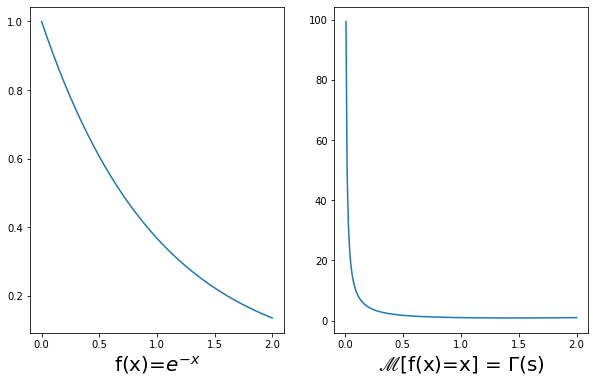

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(10,6))
ax[0].plot(x, f)
ax[1].plot(x, g)
ax[0].set_xlabel('f(x)=$e^{-x}$', fontsize=20)
ax[1].set_xlabel(r'$\mathscr{M}$[f(x)=x] = $\Gamma$(s)', fontsize=20)

And the same for the LaPlace transform:

(0, 1.1)

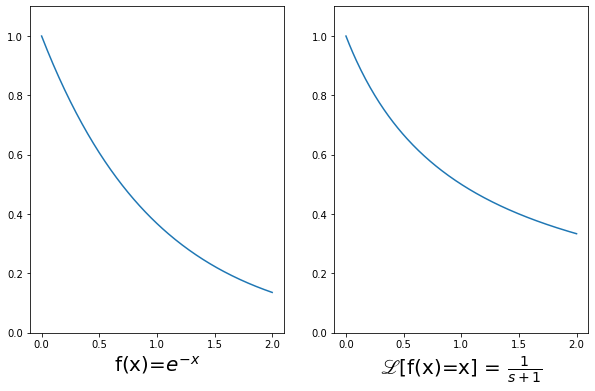

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=(10,6))
ax[0].plot(x, f)
ax[1].plot(x, g2)
ax[0].set_xlabel('f(x)=$e^{-x}$', fontsize=20)
ax[1].set_xlabel(r'$\mathscr{L}$[f(x)=x] = $\frac{1}{s+1}$', fontsize=20)
ax[0].set_ylim(0, 1.1)
ax[1].set_ylim(0, 1.1)

The kernel of the LaPlace transform is $K(s,t) = e^{-st}$:

$$\mathscr{L}[f(t)] = \int_{0}^{\infty}{e^{-st}f(t)dt} = F(s) $$

## Existence

Not every function has a LaPlace transform that exists. You are taking an integral to $\infty$, after all, and in some cases the integral won't converge.

**Existence Theorem**: Consider a function f(t) which is piecewise continuous on any finite interval in $t \ge 0$ and such that

$$\mid f(t) \mid \le Ke^{\alpha t} \text{ for } t \ge 0 $$

where $K > 0$ and $\alpha$ are real constants. The corresponding LaPlace transform exists transform exists for $s > \alpha$.

This is just a sufficient condition, meaning there are LaPlace transforms out there that don't meet this criteria.

Also note that continuous functions have unique LaPlace transforms. But piecewise continuous functions can actually have the same LaPlace transform.

You can use tables to look up transforms as you need them, but doing the integrals yourself a few times helps you grasp what the transform actually does.

## Transforms of Periodic Functions

Let's look at a few properties of LaPlace transforms that you may not be familiar with. For instance, periodic functions:

$$f(t + jp) = f(t), t \ge 0, j=1,2,3... $$

This has the LaPlace transform

$$\mathscr{L}[f(t)] = \frac{1}{1 - e^{-sp}}\int_{0}^{p}{e^{-st}f(t)dt}$$

For example, the periodic function

$$ f(t) = \begin{cases} 
      0 & j < x < j + 1/2 \\ 
      1 & j + 1/2 < j +1
   \end{cases}, j = 1,2,3,...$$

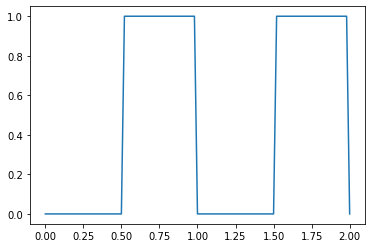

In [13]:
x = np.linspace(0, 2, 101)
y = 0*x
y[(0.5 < x) & (x < 1)] = 1
y[(1.5 < x) & (x < 2)] = 1

plt.plot(x,y)

The transform of a single period is two Heaviside (step function) transforms:

$$\frac{e^{-\frac{1}{2}s}}{s} - \frac{e^{-s}}{s} $$

So the overall transform is:

$$F(s) = \frac{e^{-\frac{1}{2}s} - e^{-s}}{s[1 - e^{-s}]} $$

C:\Users\koolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


(-10, 1)

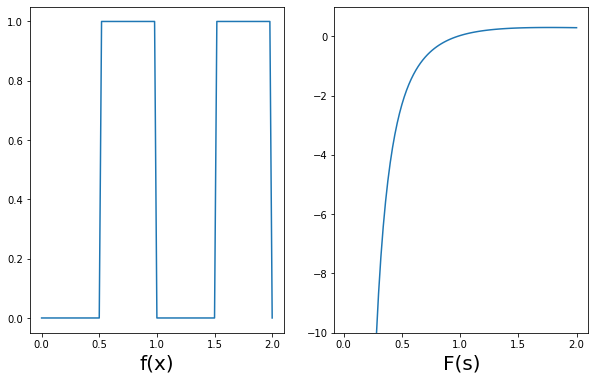

In [15]:
F = np.exp(-0.5*x) - np.exp(-x)/(x*(1 - np.exp(-x)))
fig, ax = plt.subplots(ncols=2, figsize=(10,6))
ax[0].plot(x, y)
ax[1].plot(x, F)
ax[0].set_xlabel('f(x)', fontsize=20)
ax[1].set_xlabel(r'F(s)', fontsize=20)
ax[1].set_ylim([-10,1])

## Transforms of Derivatives and Integrals

This is where LaPlace transforms get really powerful for solving ODEs and PDEs:

$$\mathscr{L}[f'(t)] = s\mathscr{L}[f(t)] - f(0) $$

You can prove it by a step of integration by parts after applying the definition of a LaPlace transform.

For integrals:

$$\mathscr{L}\bigg[ \int_{0}^{t}{f(\tau) d \tau} \bigg] = \frac{1}{s} \mathscr{L}[f(t)] $$

You can prove this by using the LaPlace transform of a derivative that we just found.

## Initial Value and Final Value Theorems

The **initial value theorem** allows you to compute the value of f(t) as $t \rightarrow 0$ from its LaPlace transform without have to intert it. Very nice when you want to get an idea of overall behavior, without some nasty math:

$$\lim_{t \rightarrow 0}{f(t)} = \lim_{s \rightarrow \infty}{sF(s)} $$

Similarly, the **final value theorem** does the same for values of f(t) as $t \rightarrow \infty$:

$$\lim_{t \rightarrow \infty}{f(t)} = \lim_{s \rightarrow 0}{sF(s)} $$

## Convolution Theorem

This one is a little messier, but can be useful in certain situations. We've seen convolutions before when examining Fourier transforms.

If $H(s) = F(s)G(s)$

Then

$$h(s) = \int_{0}^{t}{f(t - \tau) g(\tau) d\tau} $$


## Heaviside Expansion

The Heaviside Expansion will come in handy when trying to perform inverse LaPlace transforms of PDEs. If we can represent our LaPlace transform as a ratio of two polynomials:

$$F(s) = \frac{p(s)}{q(s)} $$

where the degree of q(s) is larger than the degree of p(s), then we can find the inverse transform using *partial fraction expansion*. Two cases:

**q(s) has no repeated roots**. We can represent q as:

$$q(s) = (s - a_1)(s - a_2)...(s - a_n) $$

The transform is then:

$$F(s) = \frac{p(s)}{q(s)} = \frac{A_1}{s - a_1} + \frac{A_2}{s - a_2} + ... \frac{A_N}{s - a_N}$$

Multiply by a root:

$$\frac{p(s)(s - a_j)}{q(s)} = A_1\frac{s - a_j}{s - a_1} + ... A_j ... A_N \frac{s - a_j}{s - a_N} $$

Now take the limit, and use L'Hopital's rule (remember, $q(a_j)=0$ by definition of a root):

$$\lim_{s \rightarrow a_j}{\frac{p(s)(s - a_j)}{q(s)}} = \lim_{s \rightarrow a_j}{\frac{p'(s)(s - a_j) + p(s)}{q'(s)}} = \frac{p(a_j)}{q'(a_j)} $$

This allows us to solve for the coefficients one by one:

$$A_j = \frac{p(a_j)}{q'(a_j)} $$

Thus, the 

## Example 1: Diffusion Problem

Take the transient diffusion problem in a slab:

$$D \frac{\partial^2 c}{\partial x^2} + f(t) = \frac{\partial c}{\partial t}, t>0$$

with the IC/BCs:

$$c=0, \ 0 \le x \le L, \ and \ t=0 $$
$$c=0, \ at \ x=0, \ and \ t>0 $$
$$c=0, \ at \ x=L, \ and \ t>0 $$

Applying the LaPlace transform to only the time derivative gives us an ODE in x and LaPlace space:

$$D \frac{d^2 C}{dx^2} + F(s) = sC $$

Transforming the BCs into s space as well gives:

$$C(x=0, s) = 0 $$
$$C(x=L, s) = 0$$

As this is a non-homogeneous second-order ODE, we can readily solve:

$$C_h(x,s) = d_1 \sinh{\bigg( \sqrt{\frac{s}{D}} x \bigg)} + d_2 \cosh{\bigg( \sqrt{\frac{s}{D}} x \bigg)} $$

and the particular solution:

$$C_p(x,s) = \frac{F(s)}{s} $$

Integration constants are found to be:

$$d_1 = \frac{F(s)}{s} \frac{\cosh{\bigg( \sqrt{\frac{s}{D}} L \bigg)}-1}{\sinh{\bigg( \sqrt{\frac{s}{D}} L \bigg)}} $$

$$d_2 = -\frac{F(s)}{s} $$

After some algebraic manipulation (horrible to work through, so gotta trust me here), you get a complete solution of:

$$C(x,s) =  $$